In [1]:
install.packages("caTools")
install.packages("ROCR")
install.packages("corrgram")
install.packages("rpart")
install.packages("randomForest")
install.packages("caret")
install.packages("e1071")

Installing package into ‘/home/senlyu/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/senlyu/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/senlyu/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/senlyu/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/senlyu/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/senlyu/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/senlyu/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [2]:
library(caTools)
library(ROCR)
library(corrgram)
library(rpart)
library(randomForest)
library(caret)
library(e1071)

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.
Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin



In [3]:
setwd('/home/senlyu/git/TravelersCompetition/data')

In [4]:
############### read dataset
train = read.csv('Train.csv')
train$year =as.factor(train$year)


 150  201  500  800  801  850  980 
1171  359 2011 1328  104 1791  810 

       id           tenure        claim.ind         n.adults    
 Min.   :   1   Min.   : 0.00   Min.   :0.0000   Min.   :1.000  
 1st Qu.:1895   1st Qu.: 6.00   1st Qu.:0.0000   1st Qu.:1.000  
 Median :3790   Median :13.00   Median :0.0000   Median :2.000  
 Mean   :3790   Mean   :11.71   Mean   :0.2034   Mean   :2.134  
 3rd Qu.:5685   3rd Qu.:16.00   3rd Qu.:0.0000   3rd Qu.:3.000  
 Max.   :7582   Max.   :30.00   Max.   :1.0000   Max.   :9.000  
                NA's   :2       NA's   :10       NA's   :5      
   n.children     ni.gender   ni.marital.status    premium       sales.channel
 Min.   : 0.000   F   :3610   Min.   :0.0000    Min.   : 645.8   Broker:4358  
 1st Qu.: 0.000   M   :3956   1st Qu.:0.0000    1st Qu.: 845.8   Online: 646  
 Median : 1.000   NA's:  12   Median :1.0000    Median : 901.4   Phone :2562  
 Mean   : 1.781               Mean   :0.7168    Mean   : 901.4   NA's  :  12  
 3rd Qu.: 3.000               3rd Qu.:1.0000    3rd Qu.: 956.2                
 Max. 

'data.frame':	7578 obs. of  19 variables:
 $ id               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ tenure           : int  12 18 4 16 14 14 19 13 11 14 ...
 $ claim.ind        : int  0 0 0 0 0 0 0 1 1 0 ...
 $ n.adults         : int  4 2 2 1 3 3 1 1 1 4 ...
 $ n.children       : int  2 0 0 0 3 0 1 0 3 1 ...
 $ ni.gender        : Factor w/ 2 levels "F","M": 1 2 2 1 2 1 1 2 1 2 ...
 $ ni.marital.status: int  1 1 0 1 1 0 0 0 1 1 ...
 $ premium          : num  896 828 1003 1092 885 ...
 $ sales.channel    : Factor w/ 3 levels "Broker","Online",..: 1 1 3 1 3 1 3 1 1 1 ...
 $ coverage.type    : Factor w/ 3 levels "A","B","C": 2 3 2 3 1 3 1 3 3 3 ...
 $ dwelling.type    : Factor w/ 3 levels "Condo","House",..: 1 3 2 1 3 2 3 1 3 2 ...
 $ len.at.res       : num  13 15 10 22 18 19 21 10 18 16 ...
 $ credit           : Factor w/ 3 levels "high","low","medium": 1 1 3 1 2 1 1 1 3 1 ...
 $ house.color      : Factor w/ 4 levels "blue","red","white",..: 1 3 1 2 3 3 3 1 2 3 ...
 $ ni.age           : num 

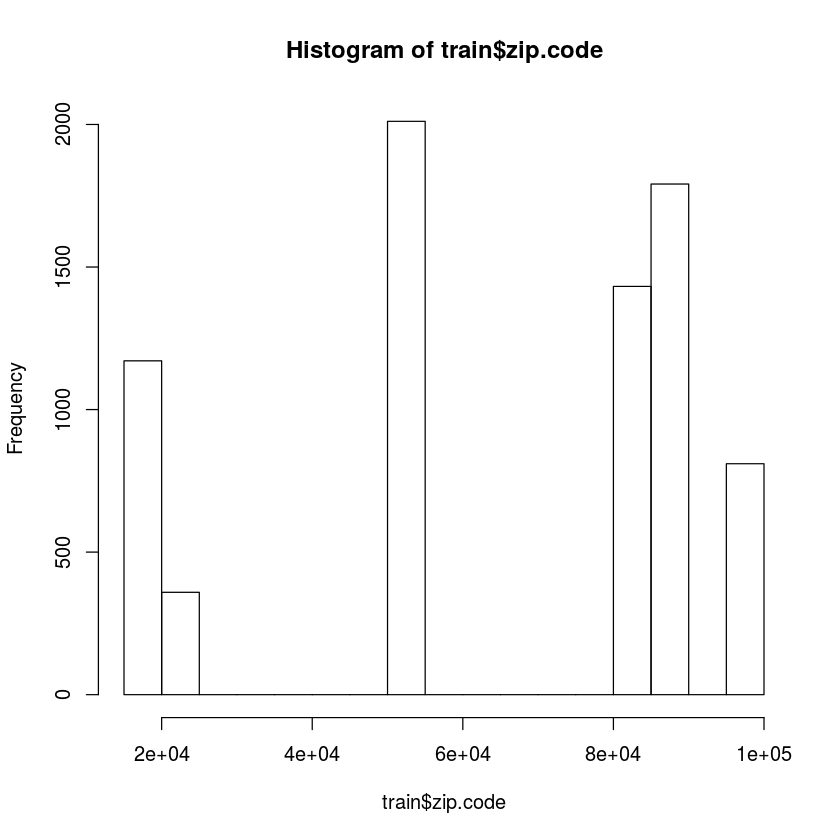

In [5]:
################## zip code (assign based on first three digits)
train$area = NA
hist(train$zip.code)
table(train$zip.code %/% 100)
train$area[train$zip.code %/% 100 ==150]="PA"
train$area[train$zip.code %/% 100 ==201]="DC"
train$area[train$zip.code %/% 100 ==500]="IA"
train$area[train$zip.code %/% 100 ==800]="CO"
train$area[train$zip.code %/% 100 ==801]="CO"
train$area[train$zip.code %/% 100 ==850]="AZ"
train$area[train$zip.code %/% 100 ==980]="WA"

train$area =as.factor(train$area)
train$zip.code=as.factor(train$zip.code)
train =train[,c(1:17,19,18)]
summary(train)
str(train)

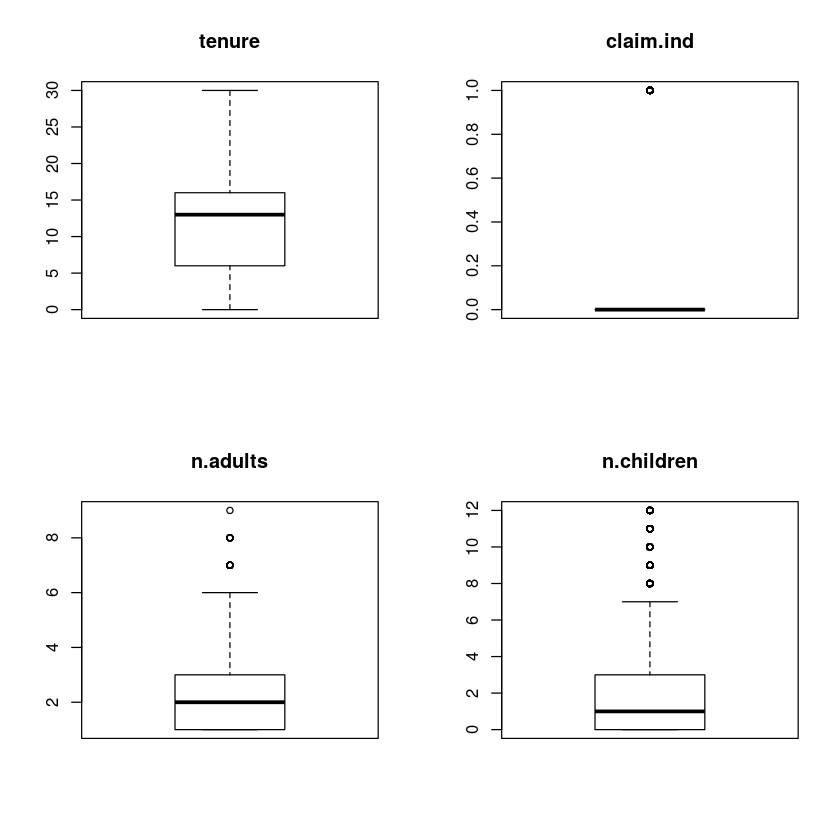

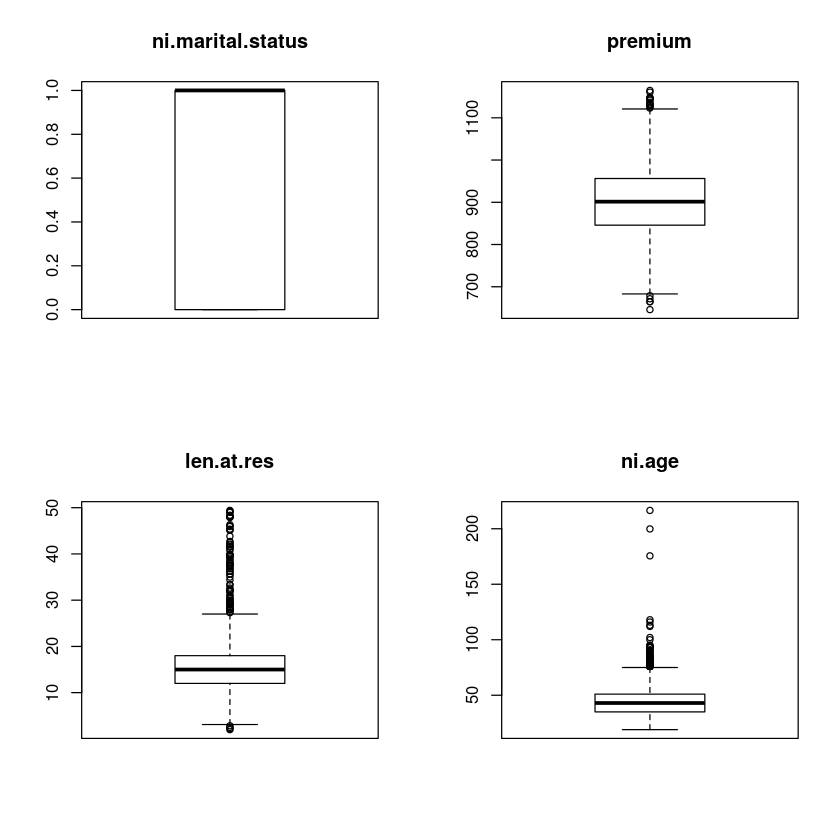

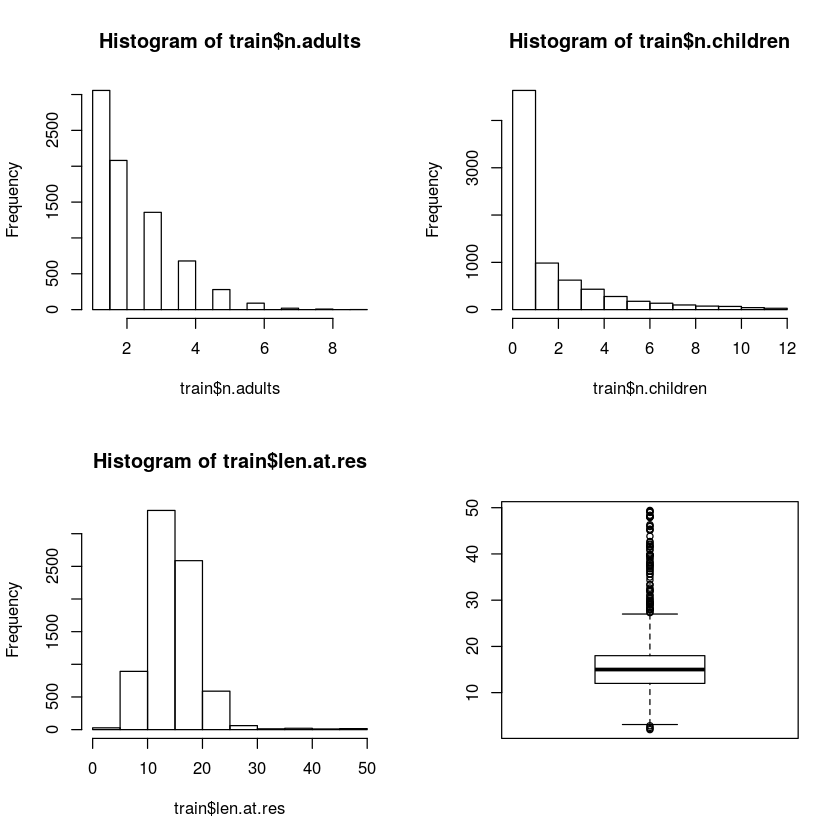

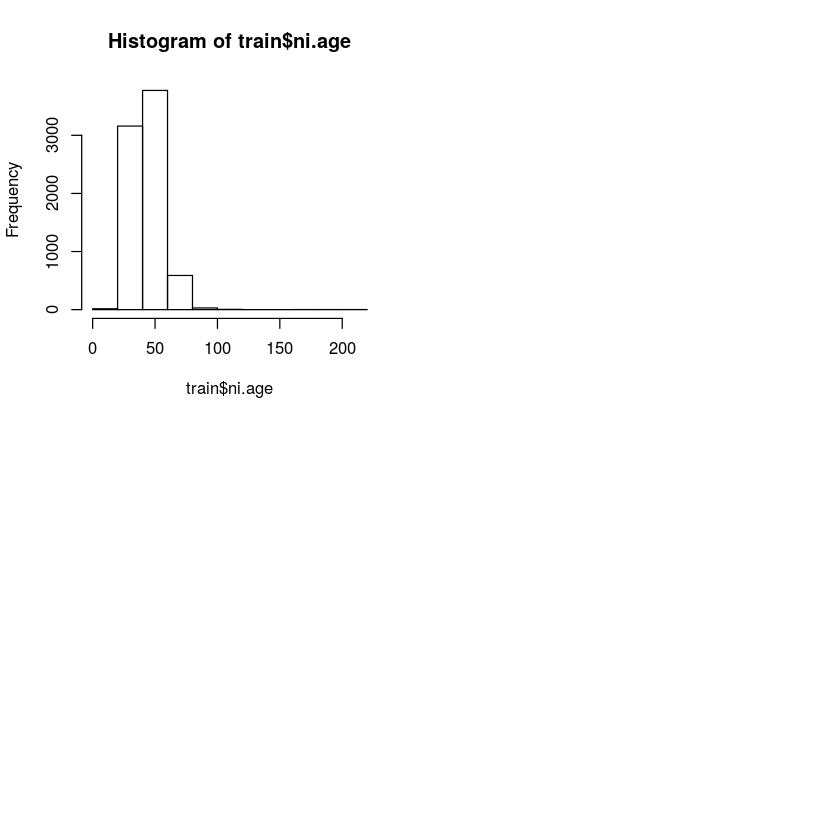

In [6]:
################## Outliers
par(mfrow=c(2,2))
for (i in (2:18)) {
  if(class(train[,i])!='factor') {
  boxplot(train[,i],main = colnames(train)[i])}
  else {next}
}

#n.adults
hist(train$n.adults)
#nrow(subset(train,train$n.adults>6))
train1 = subset(train,train$n.adults<=6)

#n.children
hist(train$n.children)
#nrow(subset(train,train$n.children<=7))
train2 = subset(train1,train1$n.adults<=7)

#len.at.res
hist(train$len.at.res)
boxplot(train$len.at.res)
#nrow(subset(train,train$len.at.res>27))
train3 = subset(train2,train2$len.at.res<=27)

#ni.age
hist(train$ni.age)
#nrow(subset(train,train$ni.age>80))
train4 = subset(train3,train3$ni.age<=90)

In [7]:
###################### deal with Numeric NAs
for (i in (2:18)) {
  if(class(train4[,i])!='factor') {
    if (sum(is.na(train4[,i]))!=0) {
      train4[which(is.na(train4[,i])),i]=mean(train4[,i],na.rm=T)
    }
  }
  else {next}
}

summary(train4[,-c(6,9,10,11,13,14,16,17,18)])
str(train)

###################### deal with categorical NAs
summary(train[,c(6,9,10,11,13,14,16,17,18)])
 #i=6
for (i in (2:18)) {
  if(class(train4[,i])=='factor') {
    if (sum(is.na(train4[,i]))!=0) {
      train4=subset(train4,!is.na(train4[,i]))
    }
  } 
  else {next}
} 

summary(train4)

       id           tenure        claim.ind         n.adults    
 Min.   :   1   Min.   : 0.00   Min.   :0.0000   Min.   :1.000  
 1st Qu.:1905   1st Qu.: 6.00   1st Qu.:0.0000   1st Qu.:1.000  
 Median :3794   Median :13.00   Median :0.0000   Median :2.000  
 Mean   :3796   Mean   :11.71   Mean   :0.2039   Mean   :2.113  
 3rd Qu.:5686   3rd Qu.:16.00   3rd Qu.:0.0000   3rd Qu.:3.000  
 Max.   :7582   Max.   :30.00   Max.   :1.0000   Max.   :6.000  
   n.children     ni.marital.status    premium         len.at.res   
 Min.   : 0.000   Min.   :0.0000    Min.   : 645.8   Min.   : 2.00  
 1st Qu.: 0.000   1st Qu.:0.0000    1st Qu.: 845.9   1st Qu.:12.00  
 Median : 1.000   Median :1.0000    Median : 901.4   Median :15.00  
 Mean   : 1.775   Mean   :0.7167    Mean   : 901.4   Mean   :14.96  
 3rd Qu.: 3.000   3rd Qu.:1.0000    3rd Qu.: 955.9   3rd Qu.:18.00  
 Max.   :12.000   Max.   :1.0000    Max.   :1164.8   Max.   :27.00  
     ni.age          cancel       
 Min.   :19.00   Min.   :-1

'data.frame':	7578 obs. of  19 variables:
 $ id               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ tenure           : int  12 18 4 16 14 14 19 13 11 14 ...
 $ claim.ind        : int  0 0 0 0 0 0 0 1 1 0 ...
 $ n.adults         : int  4 2 2 1 3 3 1 1 1 4 ...
 $ n.children       : int  2 0 0 0 3 0 1 0 3 1 ...
 $ ni.gender        : Factor w/ 2 levels "F","M": 1 2 2 1 2 1 1 2 1 2 ...
 $ ni.marital.status: int  1 1 0 1 1 0 0 0 1 1 ...
 $ premium          : num  896 828 1003 1092 885 ...
 $ sales.channel    : Factor w/ 3 levels "Broker","Online",..: 1 1 3 1 3 1 3 1 1 1 ...
 $ coverage.type    : Factor w/ 3 levels "A","B","C": 2 3 2 3 1 3 1 3 3 3 ...
 $ dwelling.type    : Factor w/ 3 levels "Condo","House",..: 1 3 2 1 3 2 3 1 3 2 ...
 $ len.at.res       : num  13 15 10 22 18 19 21 10 18 16 ...
 $ credit           : Factor w/ 3 levels "high","low","medium": 1 1 3 1 2 1 1 1 3 1 ...
 $ house.color      : Factor w/ 4 levels "blue","red","white",..: 1 3 1 2 3 3 3 1 2 3 ...
 $ ni.age           : num 

 ni.gender   sales.channel coverage.type dwelling.type    credit    
 F   :3610   Broker:4358   A   :2583     Condo :1770   high  :4678  
 M   :3956   Online: 646   B   :1816     House :4239   low   :1245  
 NA's:  12   Phone :2562   C   :3175     Tenant:1558   medium:1644  
             NA's  :  12   NA's:   4     NA's  :  11   NA's  :  11  
                                                                    
                                                                    
                                                                    
 house.color     year         zip.code      area     
 blue  :2039   2013:1579   50021  : 198   AZ  :1791  
 red   :1854   2014:1828   80016  : 136   CO  :1432  
 white :2937   2015:1993   15025  : 129   DC  : 359  
 yellow: 740   2016:2178   50025  : 117   IA  :2011  
 NA's  :   8               80028  : 104   PA  :1171  
                           (Other):6890   WA  : 810  
                           NA's   :   4   NA's:   4  

       id           tenure        claim.ind         n.adults    
 Min.   :   1   Min.   : 0.00   Min.   :0.0000   Min.   :1.000  
 1st Qu.:1906   1st Qu.: 6.00   1st Qu.:0.0000   1st Qu.:1.000  
 Median :3796   Median :13.00   Median :0.0000   Median :2.000  
 Mean   :3798   Mean   :11.71   Mean   :0.2043   Mean   :2.116  
 3rd Qu.:5689   3rd Qu.:16.00   3rd Qu.:0.0000   3rd Qu.:3.000  
 Max.   :7582   Max.   :30.00   Max.   :1.0000   Max.   :6.000  
                                                                
   n.children     ni.gender ni.marital.status    premium       sales.channel
 Min.   : 0.000   F:3505    Min.   :0.0000    Min.   : 645.8   Broker:4244  
 1st Qu.: 0.000   M:3869    1st Qu.:0.0000    1st Qu.: 846.1   Online: 631  
 Median : 1.000             Median :1.0000    Median : 901.6   Phone :2499  
 Mean   : 1.776             Mean   :0.7164    Mean   : 901.5                
 3rd Qu.: 3.000             3rd Qu.:1.0000    3rd Qu.: 956.1                
 Max.   :12.000   

In [8]:
######################  dummy variable
colnames(train4)[c(6,9,10,11,13,14,18)]
fmla = as.formula(paste("~",paste(colnames(train4)[c(6,9,10,11,13,14,18)],
                                  collapse = "+"),sep = ""))
dummies = model.matrix(fmla,train4)[,-1]
dummies = as.data.frame(dummies)
train5 = cbind(dummies,train4[,-c(6,9,10,11,13,14,16,17,18)])
summary(train5)

[1] "ni.gender"     "sales.channel" "coverage.type" "dwelling.type"
[5] "credit"        "house.color"   "area"

   ni.genderM     sales.channelOnline sales.channelPhone coverage.typeB  
 Min.   :0.0000   Min.   :0.00000     Min.   :0.0000     Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.00000     1st Qu.:0.0000     1st Qu.:0.0000  
 Median :1.0000   Median :0.00000     Median :0.0000     Median :0.0000  
 Mean   :0.5247   Mean   :0.08557     Mean   :0.3389     Mean   :0.2396  
 3rd Qu.:1.0000   3rd Qu.:0.00000     3rd Qu.:1.0000     3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.00000     Max.   :1.0000     Max.   :1.0000  
 coverage.typeC   dwelling.typeHouse dwelling.typeTenant   creditlow    
 Min.   :0.0000   Min.   :0.000      Min.   :0.0000      Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:0.000      1st Qu.:0.0000      1st Qu.:0.000  
 Median :0.0000   Median :1.000      Median :0.0000      Median :0.000  
 Mean   :0.4201   Mean   :0.559      Mean   :0.2057      Mean   :0.165  
 3rd Qu.:1.0000   3rd Qu.:1.000      3rd Qu.:0.0000      3rd Qu.:0.000  
 Max.   :1.0000   Max.   :1.000      Max.   

In [9]:
#######################  remove cancel -1 value
table(train$cancel)
train6 = train5[train5$cancel!=-1,]
summary(train6)


  -1    0    1 
  25 5710 1843 

   ni.genderM    sales.channelOnline sales.channelPhone coverage.typeB  
 Min.   :0.000   Min.   :0.00000     Min.   :0.0000     Min.   :0.0000  
 1st Qu.:0.000   1st Qu.:0.00000     1st Qu.:0.0000     1st Qu.:0.0000  
 Median :1.000   Median :0.00000     Median :0.0000     Median :0.0000  
 Mean   :0.525   Mean   :0.08545     Mean   :0.3391     Mean   :0.2396  
 3rd Qu.:1.000   3rd Qu.:0.00000     3rd Qu.:1.0000     3rd Qu.:0.0000  
 Max.   :1.000   Max.   :1.00000     Max.   :1.0000     Max.   :1.0000  
 coverage.typeC   dwelling.typeHouse dwelling.typeTenant   creditlow     
 Min.   :0.0000   Min.   :0.0000     Min.   :0.0000      Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000     1st Qu.:0.0000      1st Qu.:0.0000  
 Median :0.0000   Median :1.0000     Median :0.0000      Median :0.0000  
 Mean   :0.4201   Mean   :0.5584     Mean   :0.2059      Mean   :0.1649  
 3rd Qu.:1.0000   3rd Qu.:1.0000     3rd Qu.:0.0000      3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.0000     Max.   :

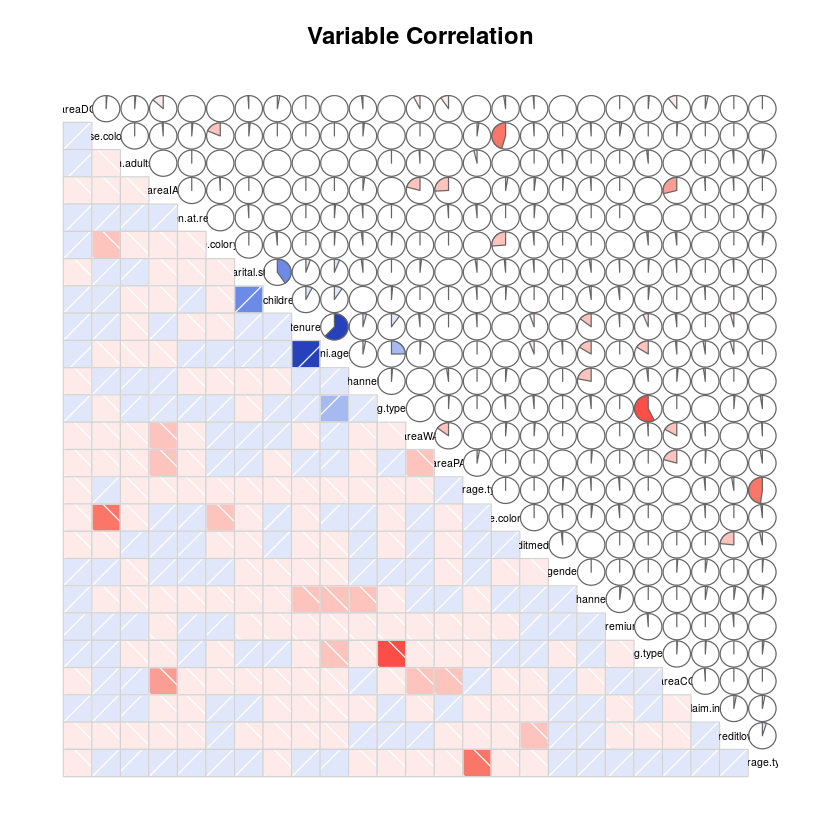

In [10]:
########### correlation plot


corrgram(train6[,-c(18,27)], order=TRUE, lower.panel=panel.shade,
         upper.panel=panel.pie, text.panel=panel.txt,
         main="Variable Correlation")

In [11]:
#########################  standardization

range01 = function(x){
  (x-min(x))/(max(x)-min(x))
}
train6$tenure = range01(train6$tenure)
train6$n.adults=range01(train6$n.adults)
train6$n.children=range01(train6$n.children)
train6$premium=range01(train6$premium)
train6$len.at.res=range01(train6$len.at.res)
train6$ni.age=range01(train6$ni.age)

In [12]:
######################### split train,validation,test
table(train6$cancel)
model =train6

set.seed(123)
index = sample(nrow(model),nrow(model)*0.1)
test = model[index,]                            ########### test set
tv = model[-index,]



   0    1 
5546 1803 

In [13]:
############### Logistic Regression with balanced cross-validation training and validation
formula = as.formula(paste("cancel~",paste(colnames(model)[-c(1,18,24,27)],
                                           collapse = "+"),sep = ""))

vector_train = c()
vector_validation = c()
vector_diff = c()
vector_aic = c()
table = matrix(NA,nrow=24,ncol=500)

for (i in (1:500)) {                            ############ sampling n times
  cancel1=tv[tv$cancel==1,]
  cancel0=tv[tv$cancel==0,]
  split_train1=sample.split(cancel1$cancel,SplitRatio = .95)
  training1_set =subset(cancel1,split_train1==TRUE)
  validation1_set = subset(cancel1,split_train1==FALSE)
  split_train0=sample(nrow(cancel0),nrow(training1_set))
  training0_set =cancel0[split_train0,]
  validation0_set =cancel0[-split_train0,]
  training=rbind(training0_set,training1_set)
  validation = rbind(validation0_set,validation1_set)

  fit = glm(formula,training,family = "binomial")      ################ GLM model part
  
  pred_train = predict(fit,training,type = "response")
  pred_input = prediction(pred_train,training$cancel)
  AUC_train = performance(pred_input,"auc")
  pred_validation = predict(fit,validation,type = "response")
  pred_validation_input = prediction(pred_validation,validation$cancel)
  AUC_validation = performance(pred_validation_input,"auc")
  
  vector_aic[i] = fit$aic
  table[,i]=as.vector(fit$coefficients)
  vector_train[i]=unlist(AUC_train@y.values)
  vector_validation[i]=unlist(AUC_validation@y.values)
  vector_diff[i]=vector_train[i]-vector_validation[i]
}
matrix = as.data.frame(cbind(vector_train,vector_validation,vector_diff,vector_aic))    ########## AUC matrix
rownames(table) = c("intercept",colnames(model)[-c(1,18,24,27)])

write.csv(matrix,"LR AUC Matrix.csv",row.names = F)
best_coef =as.data.frame(table[,which.min(abs(x = matrix$vector_diff))])                 ############# best model's coefficient
write.csv(coef,"LR mean_coef.csv",row.names = F)
coef = as.data.frame(apply(table,MARGIN = 1,FUN = mean))                  ############## mean-coef


[[1]]
[1] 0.7451022

[[1]]
[1] 0.7454586



0 vs. 1,0.7454586


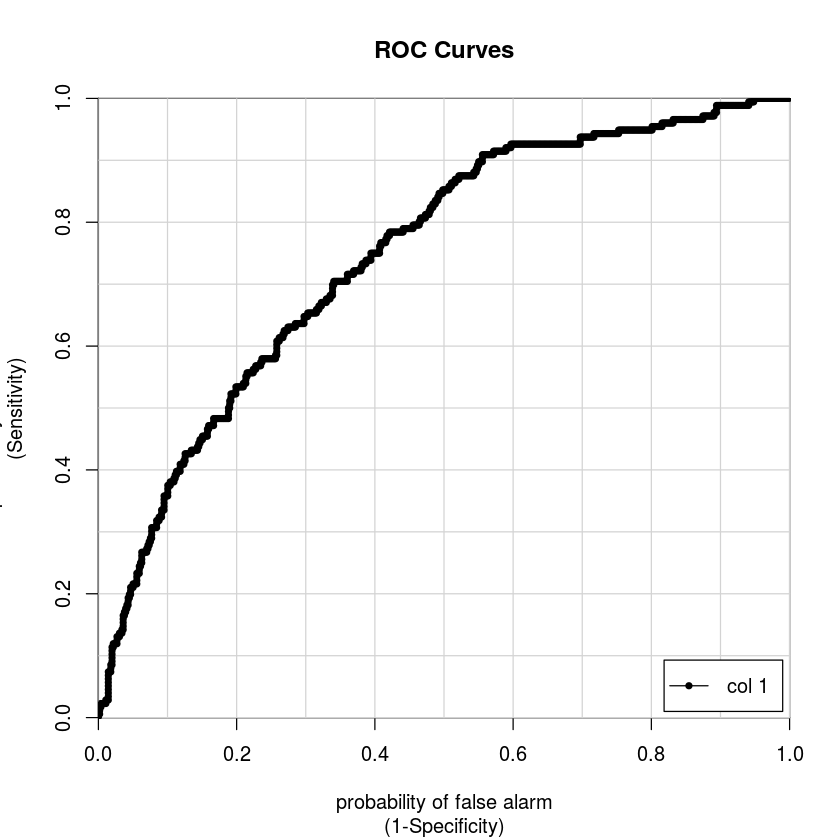

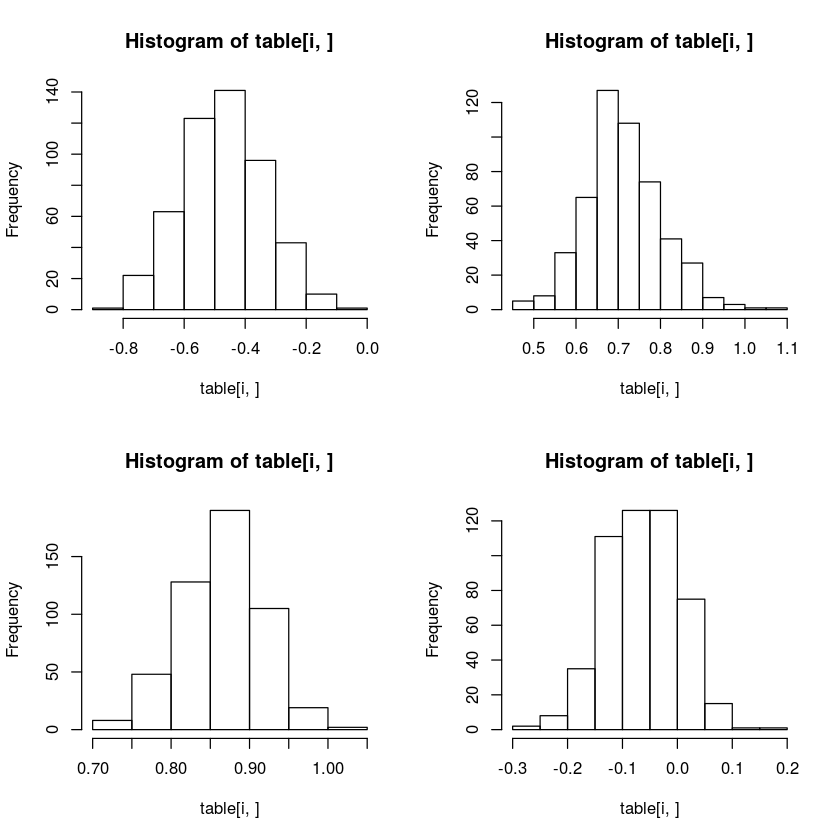

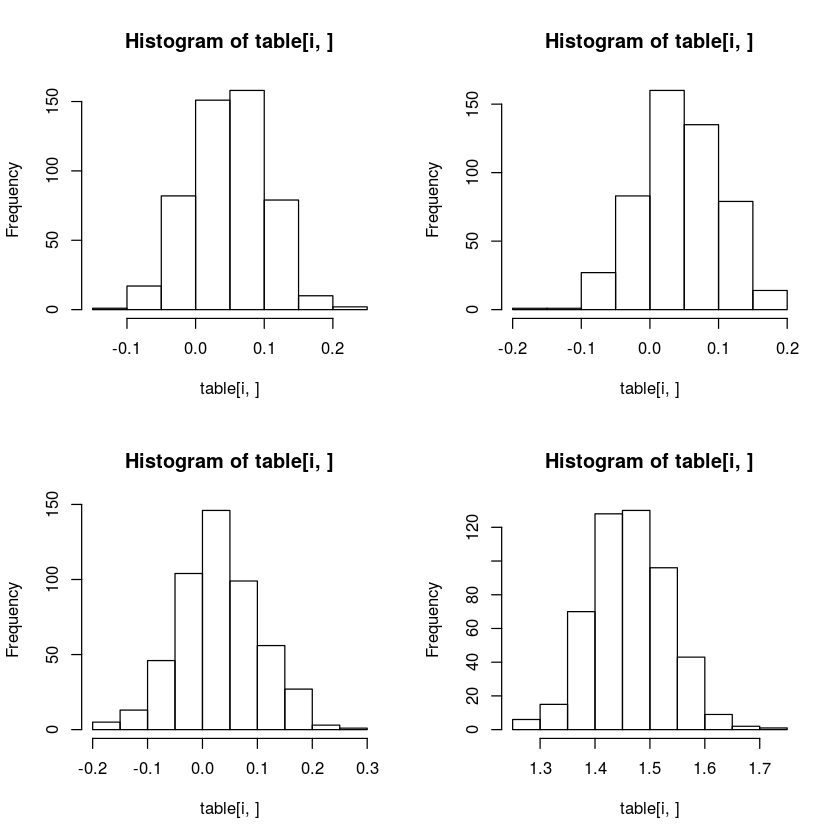

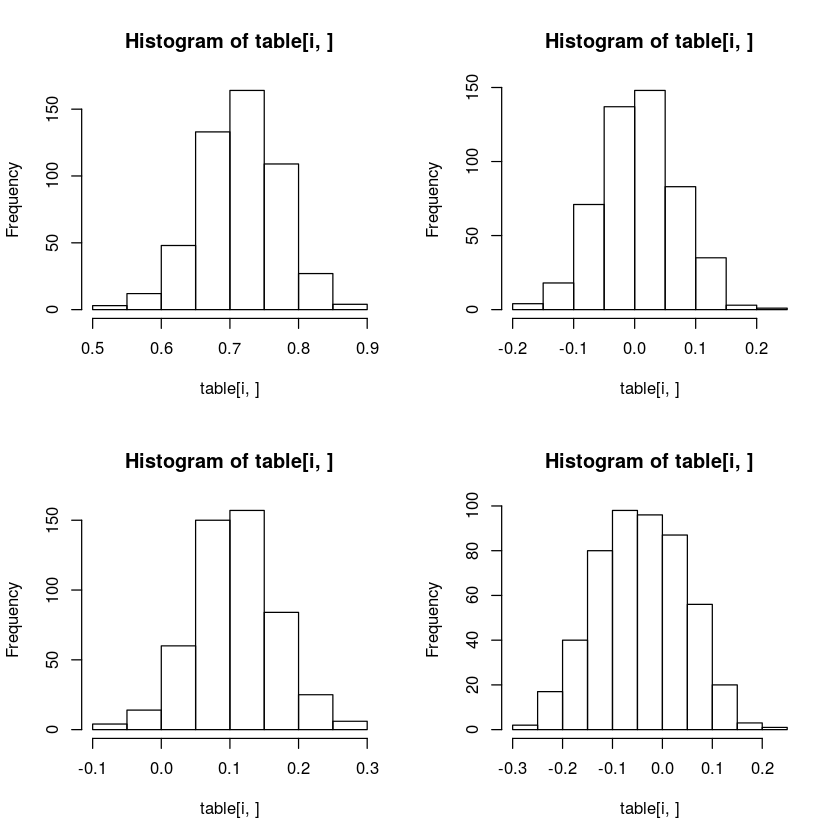

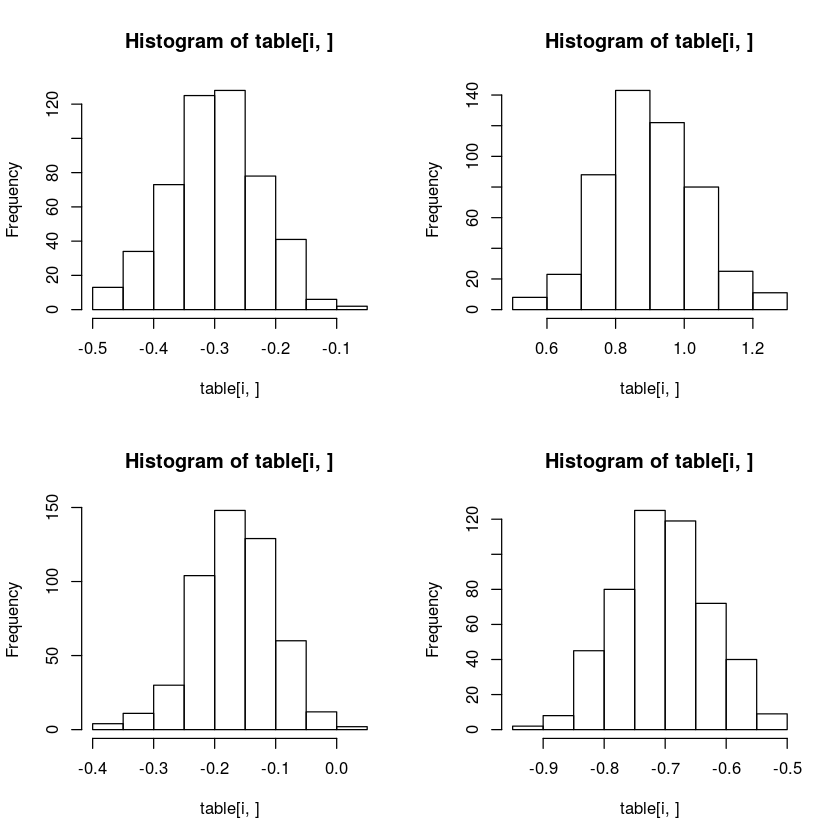

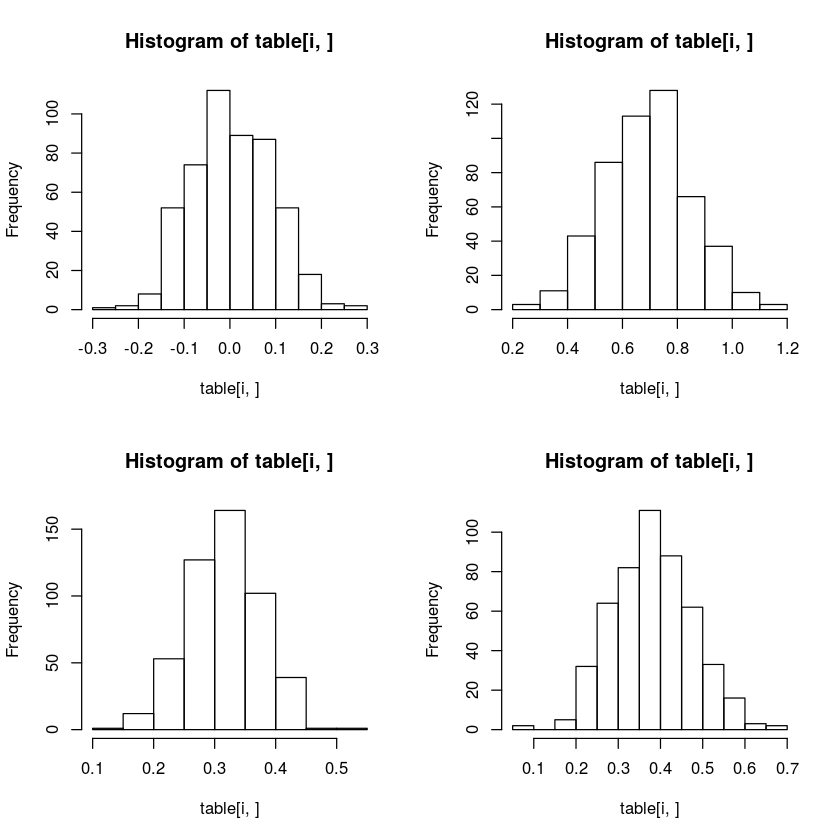

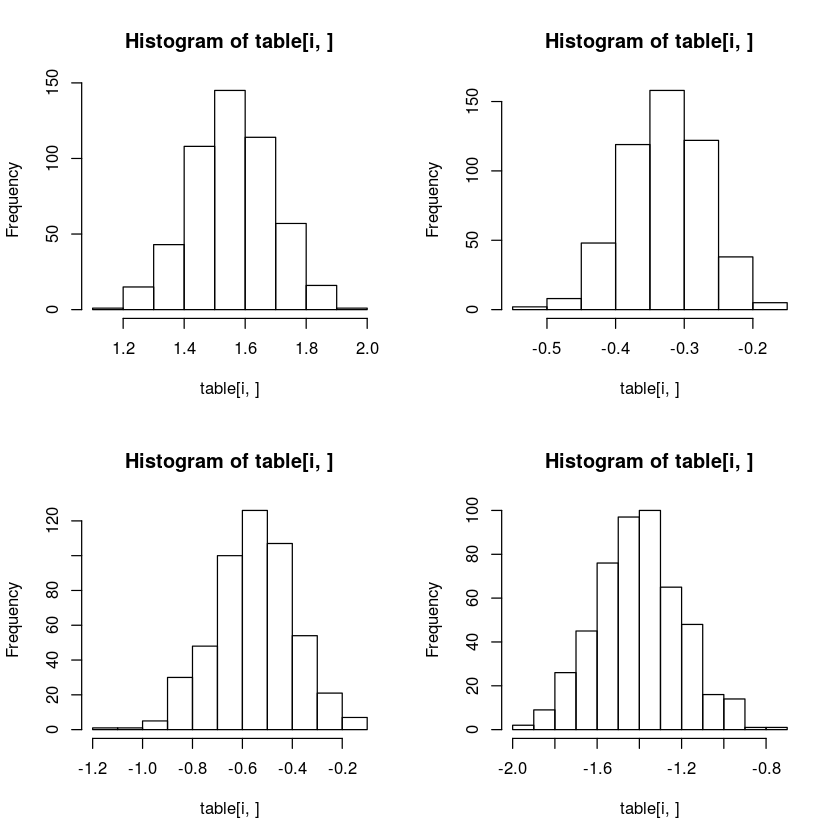

In [14]:
################### Logistic Regression predict response part
ptest = as.data.frame(t(test))

check = cbind(coef[match(rownames(ptest),rownames(coef)),],ptest)   ######## test mean-coef:AUC 0.745
intercept = coef[1,1]
check = rbind(intercept,check)
rownames(check)[1]="intercept"
colnames(check)[1]="coef"
check$coef[is.na(check$coef)]=0
check[1,2:ncol(check)]=0

prob = apply(check[,2:ncol(check)],MARGIN = 2,function(x) 1/(1+exp(-(sum(x*check[,1])+check[1,1]))))

pred_input = prediction(prob,test$cancel)
AUC =performance(pred_input,"auc")
print(AUC@y.values)

#####
check2 = cbind(best_coef[match(rownames(ptest),rownames(best_coef)),],ptest)   ######## test best-coef:AUC 0.748

intercept = best_coef[1,1]
check2 = rbind(intercept,check2)
rownames(check2)[1]="intercept"
colnames(check2)[1]="coef"
check2$coef[is.na(check2$coef)]=0
check2[1,2:ncol(check2)]=0

prob = apply(check2[,2:ncol(check2)],MARGIN = 2,function(x) 1/(1+exp(-(sum(x*check2[,1])+check2[1,1]))))


    
pred_input = prediction(prob,test$cancel)
AUC =performance(pred_input,"auc")
print(AUC@y.values)

colAUC(prob,test$cancel,plotROC = TRUE)                                        ########  plot ROC curve

# plot coef distribution
par(mfrow=c(2,2))
for (i in (1:nrow(table))) {
  hist(table[i,])
}

In [15]:


#################### CART model



model$cancel=as.factor(model$cancel)
test = model[index,]                                                          ########### test set
tv = model[-index,]

fit = rpart(formula,data = tv,method = "class")
summary(fit)

pred = predict(fit,test,type = "prob")
p =prediction(pred[,2],test$cancel)
auc = performance(p,"auc")
auc@y.values                                                                ########################  AUC:0.5  有问题







Call:
rpart(formula = formula, data = tv, method = "class")
  n= 6615 

           CP nsplit rel error xerror xstd
1 0.009219422      0         1      0    0

Node number 1: 6615 observations
  predicted class=0  expected loss=0.2459562  P(node) =1
    class counts:  4988  1627
   probabilities: 0.754 0.246 



[[1]]
[1] 0.5

In [16]:
##############  Random Forest

model =train6
model$cancel=as.factor(model$cancel)
test = model[index,]                           
tv = model[-index,]

fit <- randomForest(formula,data=tv,ntree = 500)

print(fit) # view results 
import = as.data.frame(importance(fit))                                         # importance of each predictor
write.csv(import,"Random Forest Importance.csv",row.names = T)
pred = predict(fit,test,type = "prob")
p =prediction(pred[,2],test$cancel)
auc = performance(p,"auc")
auc@y.values                                                                    ########################  AUC:0.71(ntree = 500)




Call:
 randomForest(formula = formula, data = tv, ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 24.76%
Confusion matrix:
     0   1 class.error
0 4785 203  0.04069767
1 1435 192  0.88199140


[[1]]
[1] 0.7020966

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13



[[1]]
[1] 0.7448171

            Length Class      Mode     
a0            58   -none-     numeric  
beta        1334   dgCMatrix  S4       
df            58   -none-     numeric  
dim            2   -none-     numeric  
lambda        58   -none-     numeric  
dev.ratio     58   -none-     numeric  
nulldev        1   -none-     numeric  
npasses        1   -none-     numeric  
jerr           1   -none-     numeric  
offset         1   -none-     logical  
classnames     2   -none-     character
call           5   -none-     call     
nobs           1   -none-     numeric  
lambdaOpt      1   -none-     numeric  
xNames        23   -none-     character
problemType    1   -none-     character
tuneValue      2   data.frame list     
obsLevels      2   -none-     character
param          0   -none-     list     

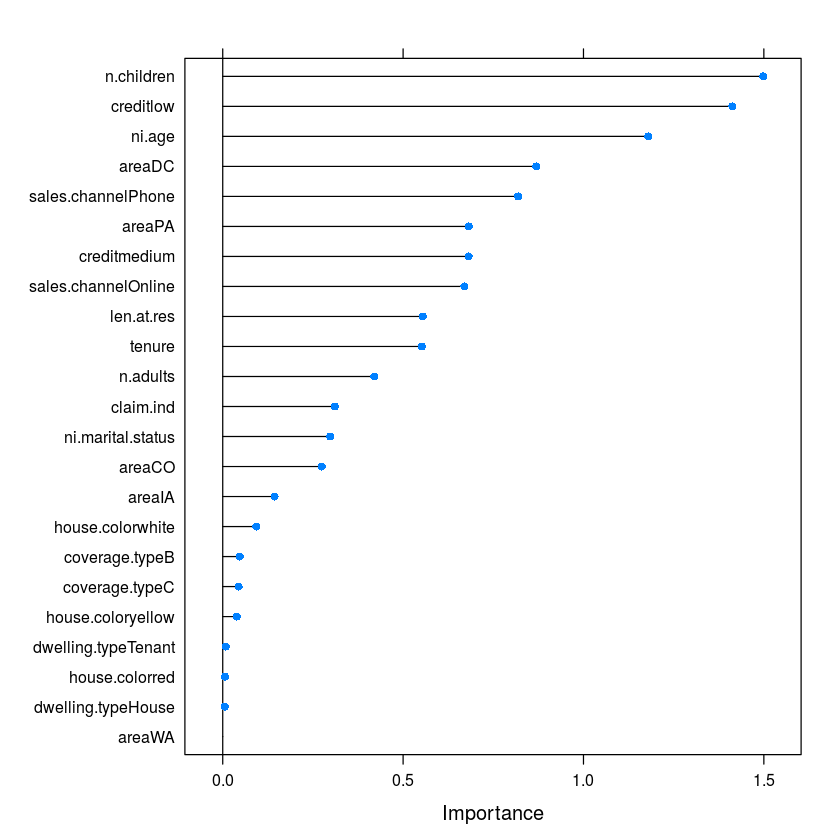

In [17]:
##################### glmnet model

model$cancel=as.factor(model$cancel)
test = model[index,]                           
tv = model[-index,]

objControl = trainControl(method = "cv", number = 50,returnResamp='none')

# run model
objModel = train(x = tv[,-c(1,18,24,27)], tv$cancel, method='glmnet',trControl=objControl)

#### predict
pred = predict(objModel,test,type = "prob")
p =prediction(pred[,2],test$cancel)
auc = performance(p,"auc")
auc@y.values                                                                   ########################  AUC:0.7448
summary(objModel)

plot(varImp(objModel,scale=F))


In [23]:
library(e1071)
test = model[index,]                           
tv = model[-index,]
formula = as.formula(paste("cancel~",paste(colnames(model)[-c(1,18,24,27)],
                                           collapse = "+"),sep = ""))
model.svm <- svm(formula, tv, probability=TRUE)
pred = predict(model.svm, test, probability=TRUE)
p = prediction(attr(pred,"probabilities")[,2],test$cancel)
auc = performance(p,"auc")
auc@y.values         



[[1]]
[1] 0.6854788